# Part II - Window or aisle .. the ultimate guide to jetlag

## by Basel Zayyat

## Investigation Overview

This investigation was targeted at identifying the main drivers for delays and cancellations in order to be able to provide recommendations for the least impact of flight delays and cancellations. 

It was observed that travellers flying Southwest, United Airlines and American Airlines, have suffered the most delays with the peak of delays concentrated between the hours 16:00 to 19:00 - a time window to avoid.

Orlando, Atlanta and Dallas airports seem to be the most congested airports.


The top 10 planes impacted by delays and cancellations were United Airlines planes with the flight numbers 419, 65 and 343 suffering above average delays and cancellations

July appears to suffer the most with July 13th having the highest mean delays, July Sunday's having the maximum mean delay and July 1 having the greatest amount cancllations over the study period.






## Dataset Overview

The complete data set consists of flight arrival and departure details for all commercial flights
within the USA, from October 1987 to April 2008.
As the original dataset is ~120MM records and for the purposes of the analysis, this analysis will
be limited to 3 years (1988,1998, and 2008).
The choice of the years considered a systematic sample where an interval of 10 years was
chosen to represent the sample population.
The data was downloaded from the American Statistical Association from <a href="http://ww2.amstat.org/sections/graphics/datasets/DataExpo2009.zip"><span>here</span></a><br>
where the original data set is collected by The data is collected by the Office of Airline
Information, Bureau of Transportation Statistics (BTS), United States Department of
Transportation. The original data set can be found <a href="https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D"><span>here</span></a><br> 
The chosen sample contains 17,596,545 rows and represents ~ 15% of the total available data
set with 29 columns.

For the purposes of this study a flight is considered delayed when it is 15
minutes later than its scheduled time and cancellation occurs when the airline does not operate
the flight at all for a certain reason as per the The Federal Aviation Administration (FAA), details
can be found <a href="https://en.wikipedia.org/wiki/Flight_cancellation_and_delay"><span>here</span></a><br>
The sample dataset was further reduced into a subset that captures delays equal to or greater
than 15 minutes and cancelled flights generating 4,400,236 rows and 29 columns for the
analysis. This subset was saved as 'd_c_flights.csv' in the project folder.
 

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe
flights = pd.read_csv('d_c_flights.csv', low_memory=False)

## Carriers to avoid .. sometimes you just need to be picky!

Northwest, United Airlines and American Airlines have incurred a total of 1,493,048 of delays and cancellations, contributing to ~ 34% of the observations in the study subset


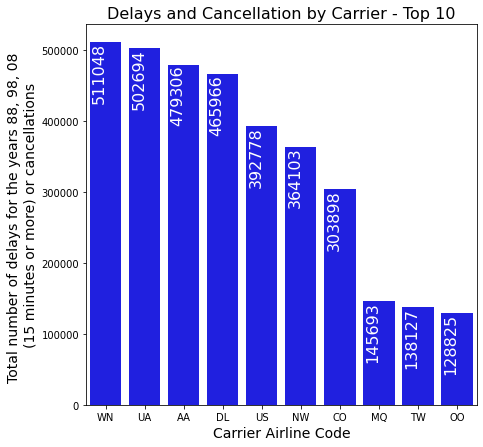

In [3]:
#number of delays / cancellations per carrier - top 10

plt_data = flights['UniqueCarrier'].value_counts().head(10)
plt_order = plt_data.index



#define plot 

plt.subplots(figsize=(7,7))
plt.rcParams.update({'axes.xmargin': 0.5})
ax = sb.countplot(data=flights,x='UniqueCarrier',color = 'Blue', order=plt_order)

#set title and axis

plt.title('Delays and Cancellation by Carrier - Top 10', fontsize=16);
plt.xlabel('Carrier Airline Code', fontsize=14);
plt.ylabel('Total number of delays for the years 88, 98, 08 \n(15 minutes or more) or cancellations', 
           fontsize=14);

#add values to bars

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03), rotation = 90,
              color = 'white', horizontalalignment='center', verticalalignment='top',
              size=16)

#display plot

plt.show()

## Airport Nightmares .. not a cliche anymore

Departing from or Arriving to Orlando, Atlanta and Dallas airports? 
As per the data these airports contribute to over 31% of the delays and cancellations impacting within the subset with 1,395,564 combined departure and arrival delays and cancellations over the study period


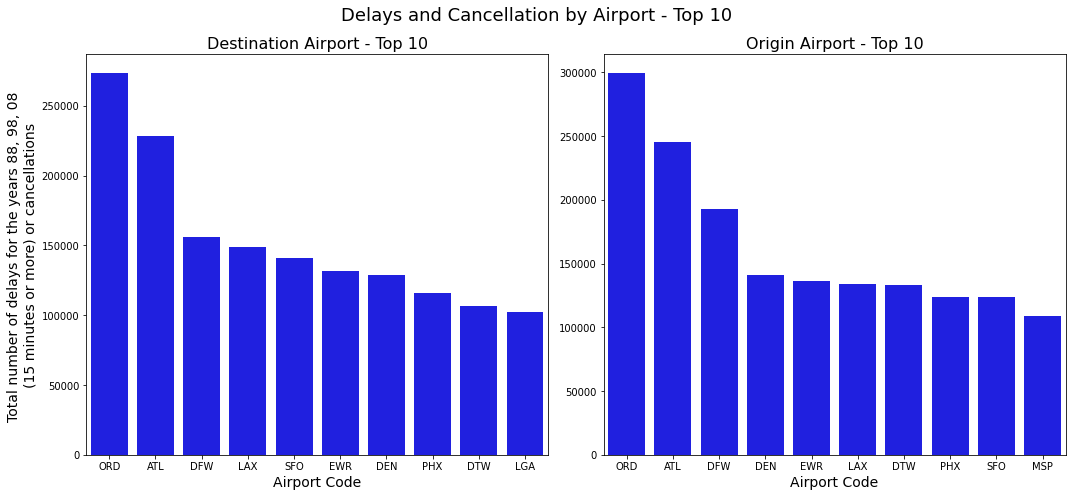

In [4]:
#define plot 

fig, axs = plt.subplots(figsize=(15,7))



#define data plot 1

plt_data = flights['Dest'].value_counts().head(10)
plt_order = plt_data.index 
a=plt_data.copy()

#plot I

plt.subplot(1, 2, 1)
sb.countplot(data=flights,x='Dest',color='Blue', order=plt_order)

#set title and axis

plt.title('Destination Airport - Top 10', fontsize=16);
plt.xlabel('Airport Code', fontsize=14);
plt.ylabel('Total number of delays for the years 88, 98, 08 \n(15 minutes or more) or cancellations', 
           fontsize=14);

plt_data = flights['Origin'].value_counts().head(10)
plt_order = plt_data.index 
b=plt_data.copy()

#define data plot 2 

plt.subplot(1, 2, 2)
sb.countplot(data=flights,x='Origin',color='Blue', order=plt_order)

#set title and axis

plt.title('Origin Airport - Top 10', fontsize=16);
plt.xlabel('Airport Code', fontsize=14);
plt.ylabel('')



#display plot

plt.suptitle("Delays and Cancellation by Airport - Top 10", fontsize=18)
fig.tight_layout()
plt.show()


## RED eye flights .. You might wanna buckle up .. 
Most of the delays occur during the period 16:00 to 19:00 - a time window to avoid, with red eye flight timings experiencing the least delays and cancellations



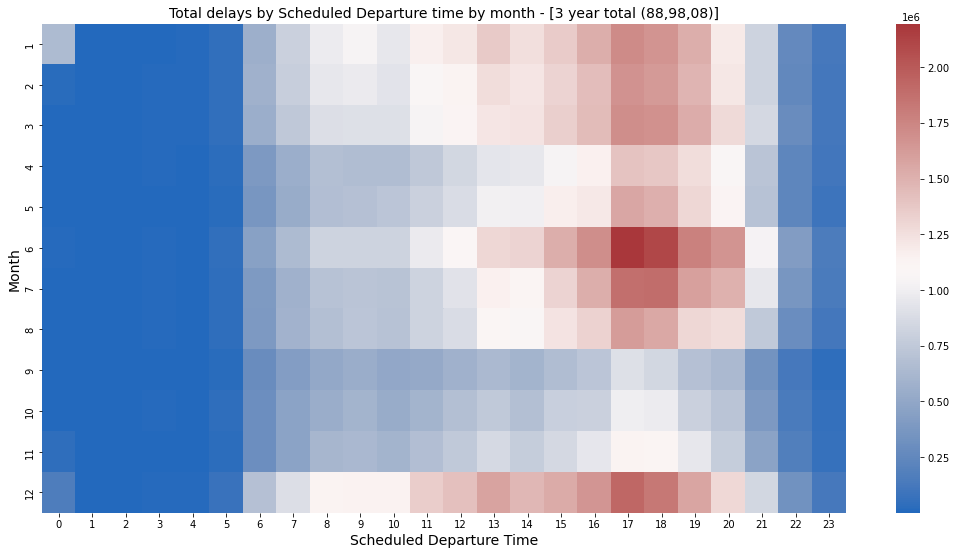

In [5]:
#convert scheduled departure and arrival times to hours only

flights['CRSDepTime'] = pd.to_datetime(flights.CRSDepTime, format='%H', exact=False).dt.hour
flights['CRSArrTime'] = pd.to_datetime(flights.CRSArrTime, format='%H', exact=False).dt.hour

#plot

plt_data = flights[(((flights['DepDelay'] != 0)|( flights['ArrDelay']!=0)))]

df = plt_data[['Month','CRSDepTime','DepDelay','ArrDelay']].copy()
df['delay']= plt_data.loc[:, ['DepDelay','ArrDelay']].max(axis=1)
pivot = df.pivot_table(index = 'Month', columns = 'CRSDepTime',values='delay', aggfunc='sum')
plt.figure(figsize=(18,9));
ax = sb.heatmap(pivot, cmap='vlag');

#set title and axis

plt.title('Total delays by Scheduled Departure time by month - [3 year total (88,98,08)]', fontsize=14);
plt.xlabel('Scheduled Departure Time', fontsize=14);
plt.ylabel('Month', fontsize=14);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
#Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt --template output-toggle.tpl

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 402140 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
